In [273]:
activity = {}
final_conf = {}

In [275]:
def step(conf,inactive_occupancies):
    active_sites = np.logical_not(np.in1d(conf, inactive_occupancies))
    active_nb = np.count_nonzero(active_sites)
    if active_nb == 0:
        return active_nb
    moving_particles_nb = np.sum(conf[active_sites])
    move_right = np.random.randint(0,2,moving_particles_nb)
    move_right = np.cumsum(move_right)[np.cumsum(conf[active_sites])-1]
    redistribute_right = np.zeros(active_nb, dtype=np.int)
    redistribute_right[0] = move_right[0]
    if active_nb > 1:
        redistribute_right[1:] = np.diff(move_right)
    redistribute_left = conf[active_sites]-redistribute_right
    conf[active_sites] = 0
    
    active_sites = np.nonzero(active_sites)[0]
    right_of_active = active_sites+1
    if right_of_active[-1] >= len(conf):
        right_of_active[-1] = 0
    conf[right_of_active] += redistribute_right
    left_of_active = active_sites-1
    if left_of_active[0] < 0:
        left_of_active[0] = len(conf)-1
    conf[left_of_active] += redistribute_left
    return active_nb

def manna(L, density, inactive_occupancies, iterations_max=1e4):
    N = int(density*L)
    conf = np.bincount(np.random.randint(0,L,size=N), minlength=L)
    initial_conf = np.array(conf)

    active_nb = 1
    active_time_series = []
    iterations = 0
    
    while active_nb:
        active_nb = step(conf,inactive_occupancies)
        active_time_series.append(active_nb)
        
        iterations += 1
        if active_nb == 0 or iterations>iterations_max:
            break
    return np.array(active_time_series), conf

In [399]:
L=5000
inactive_occupancies=(0, 1)+(10,11,12,13,14) # 0, 1 and X passive

activity[inactive_occupancies] = {}
final_conf[inactive_occupancies] = {}

for density in np.linspace(0,5,501):
    k = str(density)
    activity[inactive_occupancies][k], final_conf[inactive_occupancies][k] = \
        manna(L, density, list(inactive_occupancies), iterations_max=1e5)
    print(k, len(activity[inactive_occupancies][k]), activity[inactive_occupancies][k][-1])
    

0.0 1 0
0.01 2 0
0.02 2 0
0.03 2 0
0.04 3 0
0.05 5 0
0.06 12 0
0.07 4 0
0.08 5 0
0.09 8 0
0.1 10 0
0.11 9 0
0.12 13 0
0.13 21 0
0.14 15 0
0.15 35 0
0.16 15 0
0.17 22 0
0.18 21 0
0.19 20 0
0.2 23 0
0.21 23 0
0.22 33 0
0.23 29 0
0.24 37 0
0.25 89 0
0.26 36 0
0.27 28 0
0.28 40 0
0.29 40 0
0.3 30 0
0.31 62 0
0.32 33 0
0.33 86 0
0.34 45 0
0.35 44 0
0.36 35 0
0.37 61 0
0.38 101 0
0.39 64 0
0.4 157 0
0.41 130 0
0.42 94 0
0.43 149 0
0.44 107 0
0.45 117 0
0.46 129 0
0.47 130 0
0.48 134 0
0.49 177 0
0.5 201 0
0.51 177 0
0.52 134 0
0.53 201 0
0.54 191 0
0.55 147 0
0.56 403 0
0.57 630 0
0.58 831 0
0.59 772 0
0.6 679 0
0.61 351 0
0.62 690 0
0.63 577 0
0.64 421 0
0.65 595 0
0.66 1514 0
0.67 1119 0
0.68 675 0
0.69 1919 0
0.7 5927 0
0.71 793 0
0.72 1245 0
0.73 2184 0
0.74 956 0
0.75 1799 0
0.76 2278 0
0.77 8661 0
0.78 3781 0
0.79 4247 0
0.8 6128 0
0.81 8318 0
0.82 7682 0
0.83 31172 0
0.84 19569 0
0.85 31384 0
0.86 43130 0
0.87 47353 0
0.88 100001 166
0.89 100001 113
0.9 100001 278


KeyboardInterrupt: 

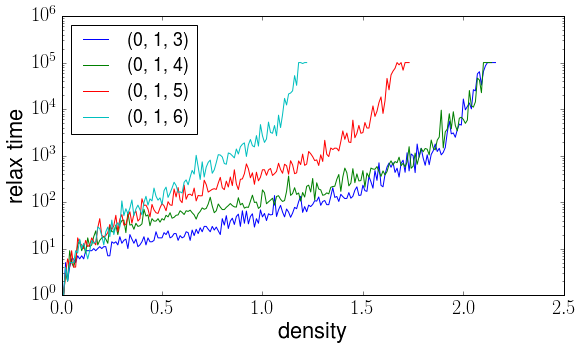

In [348]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xlabel('density')
ax.set_ylabel('relax time')

for manna_type in [(0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6)]:
    ks = sorted(activity[manna_type].keys())
    ax.plot([float(k) for k in ks], [len(activity[manna_type][k]) for k in ks], label=manna_type)
plt.legend(loc=2)

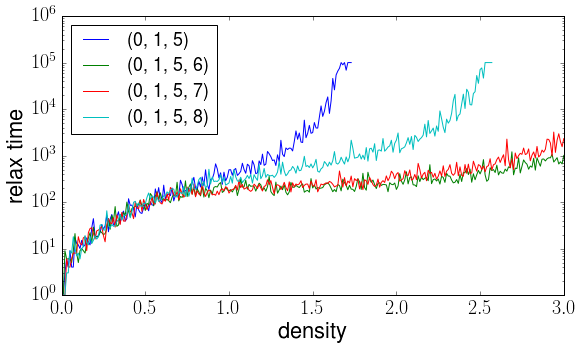

In [349]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xlabel('density')
ax.set_ylabel('relax time')

for manna_type in [(0, 1, 5), (0, 1, 5, 6), (0, 1, 5, 7), (0, 1, 5, 8)]:
    ks = sorted(activity[manna_type].keys())
    ax.plot([float(k) for k in ks], [len(activity[manna_type][k]) for k in ks], label=manna_type)
plt.legend(loc=2)

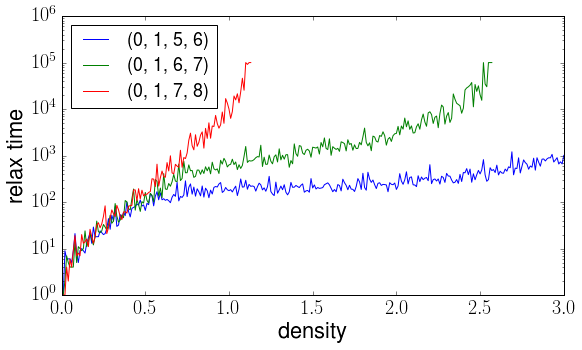

In [360]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xlabel('density')
ax.set_ylabel('relax time')


for manna_type in [(0, 1, 5, 6), (0, 1, 6, 7), (0, 1, 7, 8)]:
    ks = sorted(activity[manna_type].keys())
    ax.plot([float(k) for k in ks], [len(activity[manna_type][k]) for k in ks], label=manna_type)
plt.legend(loc=2)

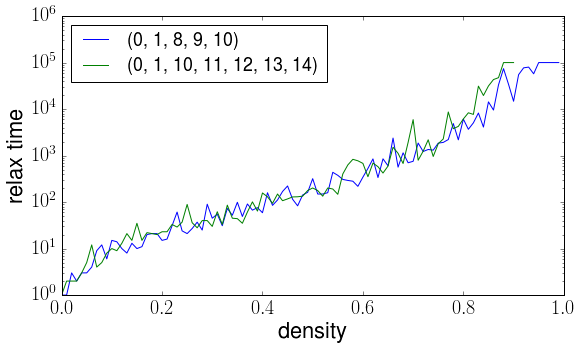

In [400]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xlabel('density')
ax.set_ylabel('relax time')


for manna_type in [(0, 1, 8, 9, 10), (0, 1, 10, 11, 12, 13, 14)]:
    ks = sorted(activity[manna_type].keys())
    ax.plot([float(k) for k in ks], [len(activity[manna_type][k]) for k in ks], label=manna_type)
plt.legend(loc=2)

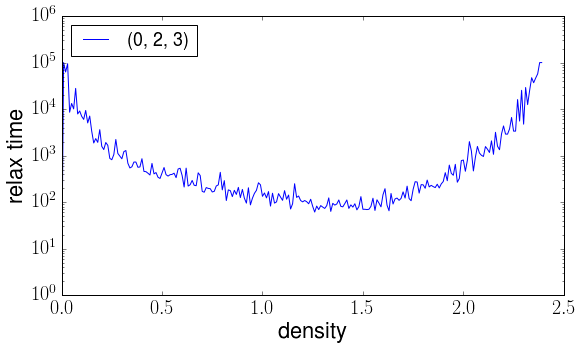

In [350]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xlabel('density')
ax.set_ylabel('relax time')


for manna_type in [(0, 2, 3)]:
    ks = sorted(activity[manna_type].keys())
    ax.plot([float(k) for k in ks], [len(activity[manna_type][k]) for k in ks], label=manna_type)
plt.legend(loc=2)

In [411]:
manna_type = (0,1,10,11,12,13,14)
activ, conf = manna(L, 6, manna_type, iterations_max=2e4)

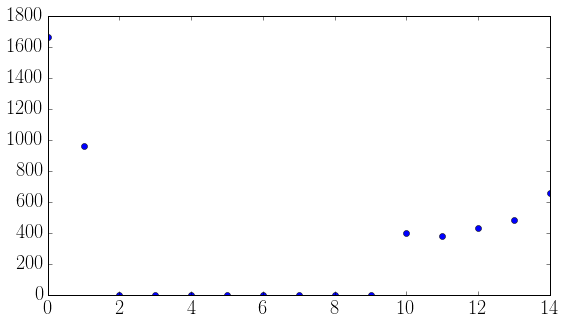

In [412]:
plt.plot(np.bincount(conf), 'o')

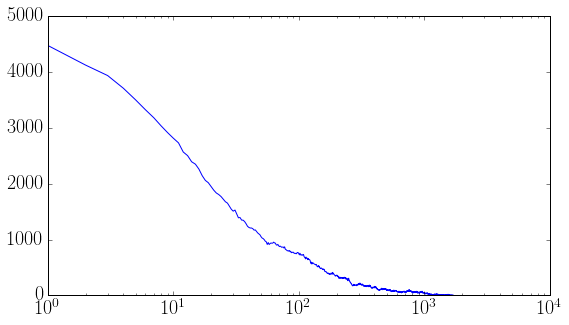

In [413]:
plt.xscale('log')
plt.plot(activ)